In [ ]:
# Uploading json file
from google.colab import files
uploaded = files.upload()

Saving shipgood_dataset.json to shipgood_dataset (1).json


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
jfile = pd.read_json("shipgood_dataset.json")
print(jfile)

          cntr_no carrier_no    pol          scheduled_pol_etd  \
0     KOCU4806726       HDMU  CNNGB                       None   
1     KOCU4138843       HDMU  VNVUT                       None   
2     HDMU4753869       HDMU  VNVUT                       None   
3     KOCU4823359       HDMU  CNNGB                       None   
4     MSCU5135983       MSCU  VNSGN                       None   
...           ...        ...    ...                        ...   
1951  LCGU8085770       CMDU  CNSHG  2021-05-11T05:00:00+08:00   
1952  DRYU9522333       COSU  CNSHG                       None   
1953  LCGU8082935       CMDU  CNSHG  2021-05-11T05:00:00+08:00   
1954  LCGU8081517       CMDU  CNSHG  2021-05-11T05:00:00+08:00   
1955  LCGU8081559       CMDU  CNSHG  2021-05-11T05:00:00+08:00   

                        pol_atd    pod          scheduled_pod_eta pod_ata  \
0                          None  USNYC                       None    None   
1                          None  USORF  2021-06-13T16

In [ ]:
# Converting json file to csv
jfile.to_csv("shipment.csv", index = False)

In [ ]:
# Creating a pandas DataFrame of csv file
original_df = pd.read_csv("shipment.csv")
print(original_df)

          cntr_no carrier_no    pol          scheduled_pol_etd  \
0     KOCU4806726       HDMU  CNNGB                        NaN   
1     KOCU4138843       HDMU  VNVUT                        NaN   
2     HDMU4753869       HDMU  VNVUT                        NaN   
3     KOCU4823359       HDMU  CNNGB                        NaN   
4     MSCU5135983       MSCU  VNSGN                        NaN   
...           ...        ...    ...                        ...   
1951  LCGU8085770       CMDU  CNSHG  2021-05-11T05:00:00+08:00   
1952  DRYU9522333       COSU  CNSHG                        NaN   
1953  LCGU8082935       CMDU  CNSHG  2021-05-11T05:00:00+08:00   
1954  LCGU8081517       CMDU  CNSHG  2021-05-11T05:00:00+08:00   
1955  LCGU8081559       CMDU  CNSHG  2021-05-11T05:00:00+08:00   

                        pol_atd    pod          scheduled_pod_eta pod_ata  \
0                           NaN  USNYC                        NaN     NaN   
1                           NaN  USORF  2021-06-13T16

In [ ]:
# Creating a copy of original data frame so that original data frame remains intact and can be used in future when needed.
df = original_df.copy()

# **Deliverable -1**

KPIs which can be used to evaluate the predictions provided to customers



### **1.On Time Delivery (ETA)**

OTD is an important KPI to measure progress of real time predective visibility. It is crucial to get accurate ETA (estimated time of arrival) because the products are a part of other organizations' supply chain and so it is essential to deliver it on time to pod.

Formula

OTD = (On time units)/ (Total units)

Higher value of OTD indicates the better accuracy of prediction. (i.e. actual time of arrival is similar to estimated time of arrival so majority of units are delivered on time.)

.


### **2.WMAPE**

WMAPE can be used to get quantitative measurement of evaluation of predictions provided to the customer by considering the criteria of pol & pod. This can further help to deduce predictions for which ports are not accurate to further evaluate it with same/different approach for better accuracy.

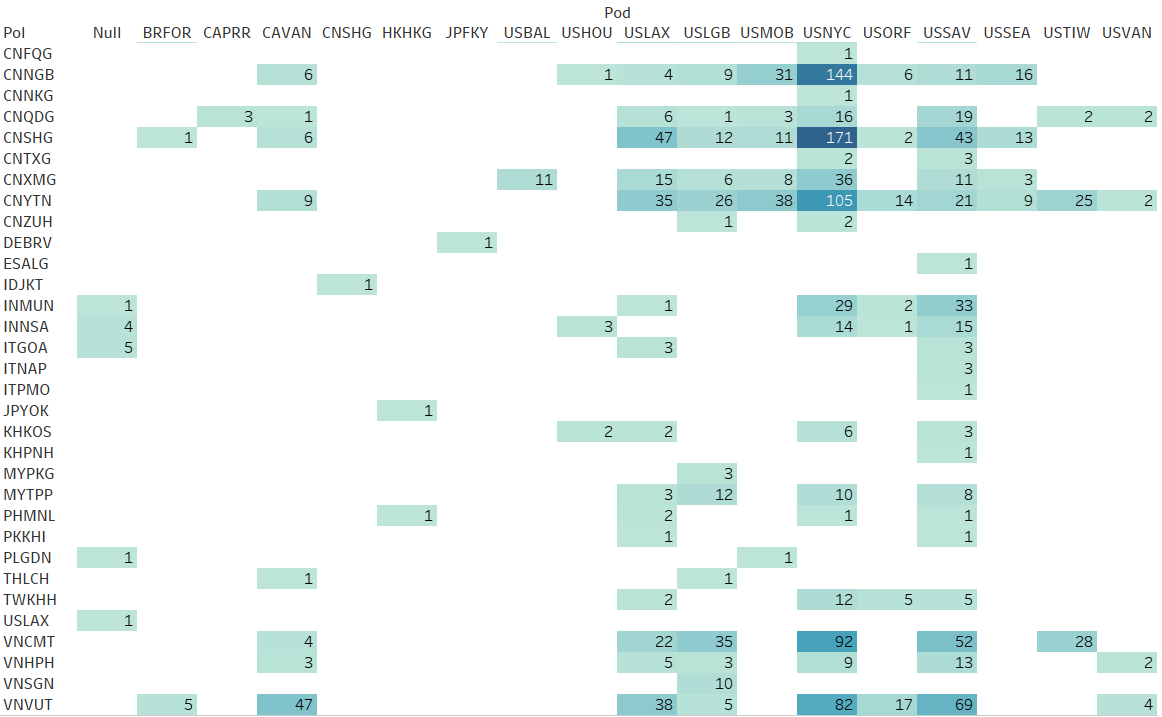


(Graph link - https://public.tableau.com/app/profile/devanshi.gandhi6876/viz/CEL_16575581744790/WMAPEPOL-POD?publish=yes)


As observed in the above heat map, US ports prominently occurs as Port of Discharge (pod) & ports at China, Vietnam, India, etc emerges as major Port of Loading (pol)

By assigning relevant weights to pol-pod pair as per there occurence as end points during a shipment and calculating weighted mean absolute percentage error of actual arrival time & estimated arrival time provides accurate evaluation of predictions provided to the customer.

Formula


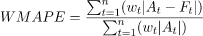

(Image source - https://www.baeldung.com/cs/mape-vs-wape-vs-wmape)

where, 

       At - Actual time of arrival of pol-pod pair t

       Ft - Forecasted time of arrival of pol-pod pair t

       wt - Weight of pol-pod pair t

.



### **3.Forecasting Accuracy**

Forecasting accuracy is an important KPI for demand forecasting. It is used to evaluate the accuracy of forecasts made.

Root Mean Squared can be used to  determine the deviation between a carrier's actual time of arrival & estimated time of arrival.

By this we can evaluate how accurate the forecast (prediction) provided to our customer is.

Formula

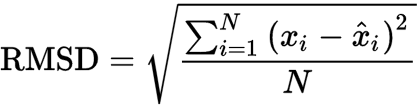

(Image source - https://en.wikipedia.org/wiki/Root-mean-square_deviation)


where

      N - number of non-null data points

      xi - actual time of arrival

      x^ i - estimated time of arrival

# **Delivarable - 2**

Exploring data using pandas library

In [ ]:
df.shape

(1956, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   cntr_no                            1956 non-null   object 
 1   carrier_no                         1956 non-null   object 
 2   pol                                1763 non-null   object 
 3   scheduled_pol_etd                  1160 non-null   object 
 4   pol_atd                            868 non-null    object 
 5   pod                                1760 non-null   object 
 6   scheduled_pod_eta                  1063 non-null   object 
 7   pod_ata                            204 non-null    object 
 8   predicted_pod_eta                  1568 non-null   object 
 9   container_pod_actual_discharge     288 non-null    object 
 10  last_container_event               1772 non-null   object 
 11  vessel_legs                        1772 non-null   float

In [ ]:
df.head()

,cntr_no,carrier_no,pol,scheduled_pol_etd,pol_atd,pod,scheduled_pod_eta,pod_ata,predicted_pod_eta,container_pod_actual_discharge,last_container_event,vessel_legs,container_pod_scheduled_discharge
0,KOCU4806726,HDMU,CNNGB,NaN,NaN,USNYC,NaN,NaN,2021-06-12T18:00:00,NaN,Vessel arrival,1.0,2021-06-12T18:00:00
1,KOCU4138843,HDMU,VNVUT,NaN,NaN,USORF,2021-06-13T16:00:00-05:00,NaN,2021-06-14T02:50:07.504794-05:00,NaN,Unclassified,1.0,2021-06-12T20:00:00
2,HDMU4753869,HDMU,VNVUT,NaN,NaN,USSAV,2021-06-16T14:00:00-05:00,NaN,2021-06-17T15:21:59.522328-05:00,NaN,Unclassified,1.0,2021-06-15T19:00:00
3,KOCU4823359,HDMU,CNNGB,NaN,NaN,USNYC,NaN,NaN,2021-05-16T19:00:00,NaN,Vessel arrival,1.0,2021-05-16T19:00:00
4,MSCU5135983,MSCU,VNSGN,NaN,NaN,USLGB,NaN,NaN,2021-06-04T00:00:00,NaN,Vessel arrival,2.0,2021-06-04T00:00:00


In [ ]:
df.tail()

,cntr_no,carrier_no,pol,scheduled_pol_etd,pol_atd,pod,scheduled_pod_eta,pod_ata,predicted_pod_eta,container_pod_actual_discharge,last_container_event,vessel_legs,container_pod_scheduled_discharge
1951,LCGU8085770,CMDU,CNSHG,2021-05-11T05:00:00+08:00,2021-05-12T10:39:23+08:00,USNYC,2021-06-04T13:00:00-05:00,NaN,2021-06-06T15:59:52.505469-05:00,NaN,Unload from vessel,1.0,2021-06-07T13:00:00
1952,DRYU9522333,COSU,CNSHG,NaN,NaN,USNYC,NaN,NaN,2021-06-20T08:00:00,NaN,Vessel arrival,1.0,2021-06-20T08:00:00
1953,LCGU8082935,CMDU,CNSHG,2021-05-11T05:00:00+08:00,2021-05-12T10:39:23+08:00,USNYC,2021-06-04T13:00:00-05:00,NaN,2021-06-06T15:59:52.505469-05:00,NaN,Unload from vessel,1.0,2021-06-07T13:00:00
1954,LCGU8081517,CMDU,CNSHG,2021-05-11T05:00:00+08:00,2021-05-12T10:39:23+08:00,USNYC,2021-06-04T13:00:00-05:00,NaN,2021-06-06T15:59:52.505469-05:00,NaN,Unload from vessel,1.0,2021-06-07T13:00:00
1955,LCGU8081559,CMDU,CNSHG,2021-05-11T05:00:00+08:00,2021-05-12T10:39:23+08:00,USNYC,2021-06-04T13:00:00-05:00,NaN,2021-06-06T15:59:52.505469-05:00,NaN,Unload from vessel,1.0,2021-06-07T13:00:00


In [ ]:
df.describe()

,vessel_legs
count,1772.000000
mean,1.142212
std,0.378832
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


In [ ]:
df.isnull().sum()

cntr_no                                 0
carrier_no                              0
pol                                   193
scheduled_pol_etd                     796
pol_atd                              1088
pod                                   196
scheduled_pod_eta                     893
pod_ata                              1752
predicted_pod_eta                     388
container_pod_actual_discharge       1668
last_container_event                  184
vessel_legs                           184
container_pod_scheduled_discharge     437
dtype: int64

In [ ]:
df.columns

Index(['cntr_no', 'carrier_no', 'pol', 'scheduled_pol_etd', 'pol_atd', 'pod',
       'scheduled_pod_eta', 'pod_ata', 'predicted_pod_eta',
       'container_pod_actual_discharge', 'last_container_event', 'vessel_legs',
       'container_pod_scheduled_discharge'],
      dtype='object')

In [ ]:
df["carrier_no"].value_counts()

ONEY    375
COSU    356
CMDU    319
HLCU    315
OOLU    187
MAEU    161
HDMU    126
MSCU     52
ZIMU     47
MEDU     11
TOLL      6
YMLU      1
Name: carrier_no, dtype: int64

In [ ]:
df["pol"].value_counts()

CNSHG    306
CNYTN    284
VNVUT    267
VNCMT    233
CNNGB    228
CNXMG     90
INMUN     66
CNQDG     53
INNSA     37
VNHPH     35
MYTPP     33
CNFOC     29
TWKHH     24
KHKOS     13
ITGOA     11
VNSGN     10
CNDLC      9
CNTXG      5
PHMNL      5
ITNAP      3
CNZUH      3
MYPKG      3
PLGDN      2
PKKHI      2
THLCH      2
IDJKT      1
JPYOK      1
BGVAR      1
CNFQG      1
ITPMO      1
ESALG      1
KHPNH      1
CNNKG      1
DEBRV      1
USLAX      1
Name: pol, dtype: int64

In [ ]:
df["pod"].value_counts()

USNYC    747
USSAV    326
USLAX    203
USLGB    128
USMOB     93
CAVAN     77
USTIW     55
USORF     47
USSEA     41
USBAL     12
USVAN     10
BRFOR      8
USHOU      6
CAPRR      3
HKHKG      2
CNSHG      1
JPFKY      1
Name: pod, dtype: int64

### **Anomaly**

The carrier no. "YMLU", "TOLL" & "MEDU" are only used 1, 6, 11 times respectively for shippment while on an average other carrier are used 215 times and atleast more than 40 times.



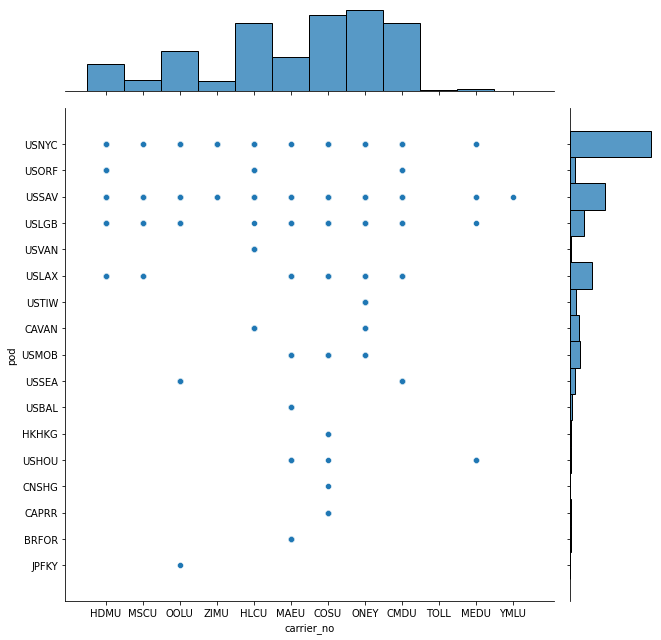

In [ ]:
sns.jointplot(x="carrier_no", y ="pod", data = df, height=9)

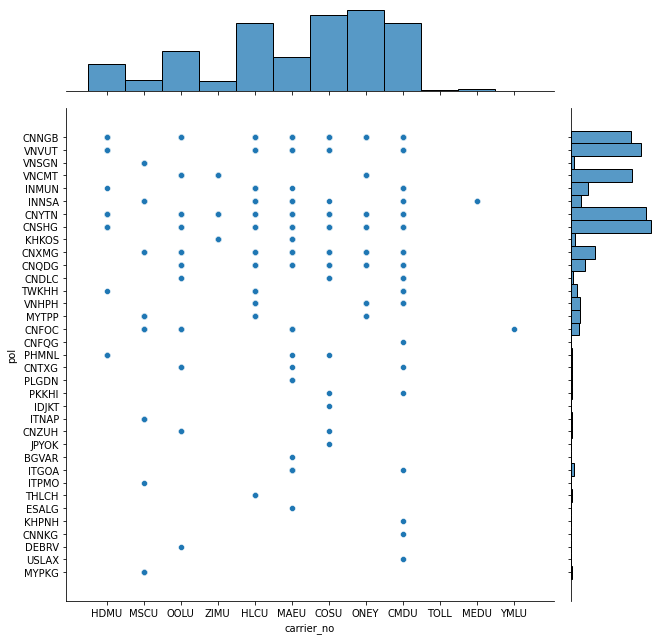

In [ ]:
sns.jointplot(x="carrier_no", y ="pol", data = df, height=9)

In [ ]:
df["vessel_legs"].value_counts()

1.0    1539
2.0     214
3.0      19
Name: vessel_legs, dtype: int64

In [ ]:
df[df["vessel_legs"]>2]

,cntr_no,carrier_no,pol,scheduled_pol_etd,pol_atd,pod,scheduled_pod_eta,pod_ata,predicted_pod_eta,container_pod_actual_discharge,last_container_event,vessel_legs,container_pod_scheduled_discharge
328,MSKU8515219,MAEU,PLGDN,NaN,NaN,NaN,NaN,NaN,2021-06-28T05:00:00,NaN,Unclassified,3.0,2021-06-28T05:00:00
451,MSKU8812752,MAEU,KHKOS,2021-05-15T15:00:00+07:00,NaN,USHOU,2021-07-04T15:00:00-06:00,NaN,2021-07-06T20:01:05.325823-06:00,NaN,Gate out,3.0,2021-07-04T15:00:00
503,AXIU2215391,MAEU,BGVAR,2021-05-05T12:30:00+03:00,2021-05-05T04:05:00+03:00,USSAV,2021-06-12T08:00:00-05:00,NaN,2021-06-13T16:48:10.879571-05:00,NaN,Gate out,3.0,2021-06-12T08:00:00
508,UETU5046500,MAEU,ITGOA,2021-06-06T18:00:00+01:00,NaN,USLAX,NaN,NaN,2021-07-09T18:30:00,NaN,Unclassified,3.0,2021-07-09T18:30:00
568,MRKU0206320,MAEU,CNFOC,NaN,NaN,BRFOR,NaN,NaN,2021-07-09T23:00:00,NaN,Unclassified,3.0,2021-07-09T23:00:00
573,MSKU6750585,MAEU,CNFOC,NaN,NaN,BRFOR,NaN,NaN,2021-07-09T23:00:00,NaN,Unclassified,3.0,2021-07-09T23:00:00
806,MRKU5374049,MAEU,VNVUT,NaN,NaN,BRFOR,NaN,NaN,2021-07-09T23:00:00,NaN,Unclassified,3.0,2021-07-09T23:00:00
813,MRKU2256361,MAEU,VNVUT,NaN,NaN,BRFOR,NaN,NaN,2021-07-09T23:00:00,NaN,Unclassified,3.0,2021-07-09T23:00:00
817,SUDU6524088,MAEU,ITGOA,2021-06-06T18:00:00+01:00,NaN,NaN,NaN,NaN,2021-07-04T01:00:00,NaN,Unclassified,3.0,2021-07-04T01:00:00
822,MRKU5369253,MAEU,VNVUT,NaN,NaN,BRFOR,NaN,NaN,2021-07-09T23:00:00,NaN,Unclassified,3.0,2021-07-09T23:00:00


### **Anomaly**
The carrier no. "MAEU" has 3 vessel legs and shows anomalous behaviour as other carriers usually have only 1 or 2 vessel legs.

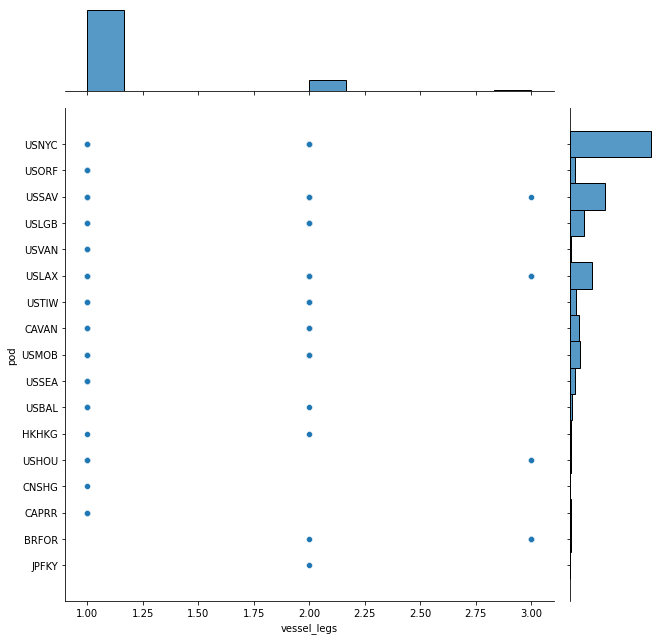

In [ ]:
sns.jointplot(x="vessel_legs", y ="pod", data = df, height=9)

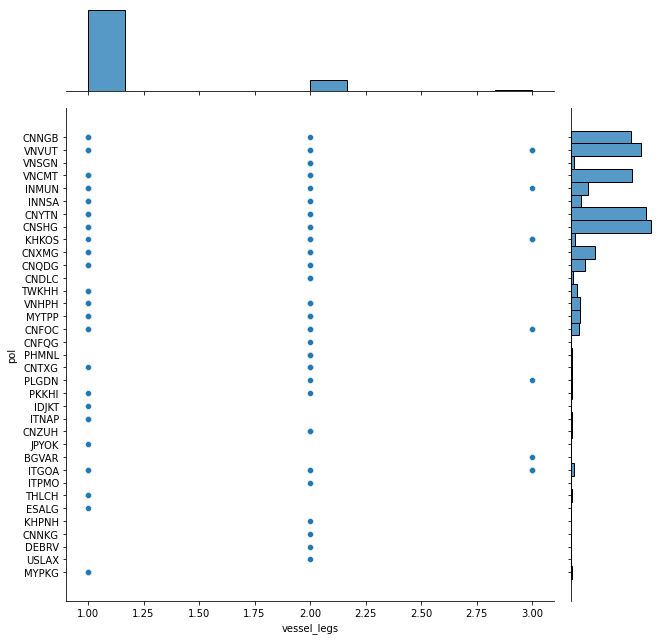

In [ ]:
sns.jointplot(x="vessel_legs", y ="pol", data = df, height=9)

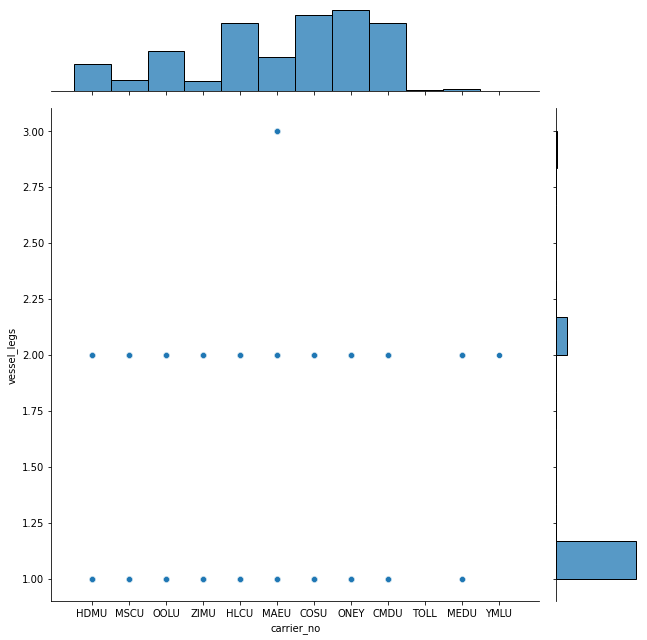

In [ ]:
sns.jointplot(x="carrier_no", y ="vessel_legs", data = df, height=9)

# **Deliverable - 3**

Existing visibility supply chain performance of the SHIPGOOD company is quite imbalanced because of following aspects

### **1. Poor Volume Fill Rate**
The current supply chain of SHIPGOOD is not using all the carriers available prominently. ("TOLL", "YMLU", etc, are used only a couple of times in a huge time span). Due to desprite of the capacity all the desired volumes can't be shipped.
Thus generating a poor volume fill rate.

### **2. Lower On Time Delivery Rate**
Few carriers have 3 vessel legs which leads to delay in reaching pod resulting in delayed delivery.

### **3. Inefficiency**
Inefficient use of resources (such as carriers) leads to delay in the time of loading carrier because of which time of dispatch at pol is delayed leading to delay in time of arrival.

### **4.Losing Profit**
Due to inappropriate resource management, resources can't be used at it's fullest leading to less profit. (Despite of availability of carrier if a carrier is not used, products need to wait to get loaded until an empty carrier is found, delays in delivery, which leads to dissatisfaction in customers' experience resulting in churning of genuine customers.


# **Deliverable - 4**

Performance improvement from using Predictions.

### **1. Incresing profits at same Freight cost**
By using predictions & anoamalies, under-used resources (carrier) can be use to it's maximum effieciency, decreasing idle resources time, leading in better **Order Fill Rate** & **Volume Fill Rate**. This will help to increase the accomodation capacity of supply chain while using **existing resources**.
This **catalyzes profit** earned without arising a need in increasing Freight cost.

### **2. Better Supply Chain Performance**

With **accurate predictions** the workflow of supply chain can be effectively analyzed, resulting in efficient & visible management of supply chain for better performance.

Also  as visible in the graph below prominent pol like CNSHG, CNNGB ships more carrier in the month of June. During this period a **target fill rate** as high as **98%** can be kept and appropriate **inventory management** can be carried out with supplier for better supply chain performance.

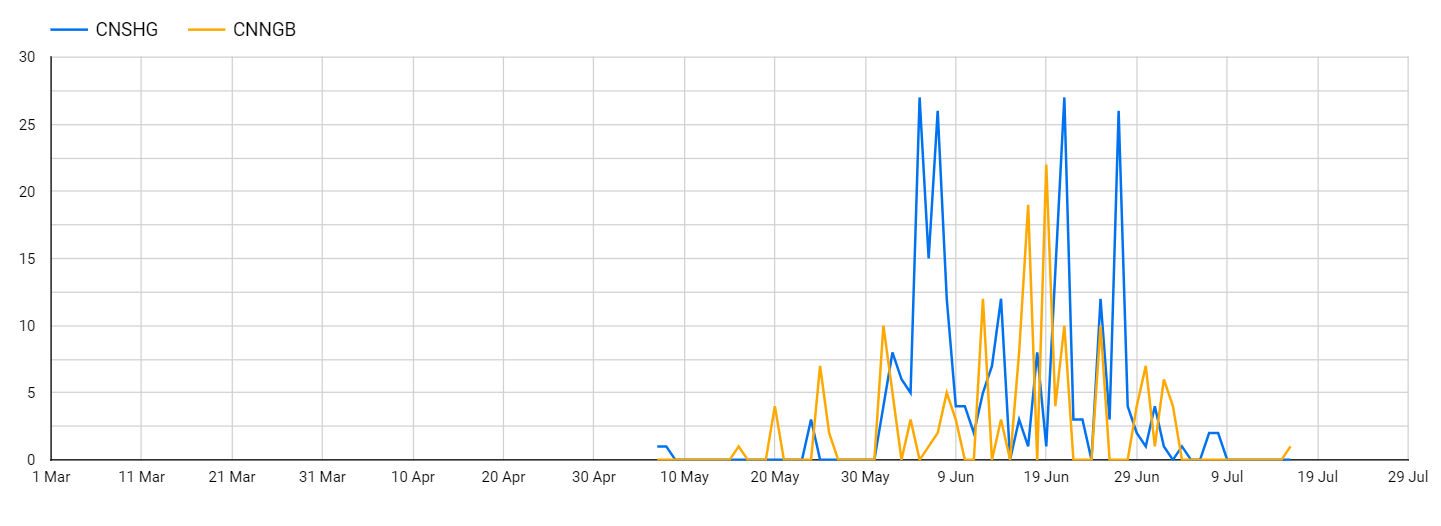


(Graph link - https://datastudio.google.com/reporting/94b03932-4464-4ee6-9377-4dbfa62bf780/page/AiaxC)



### **3.Higher Customer Satisfaction**

By **decreasing** unnecessary **vessel leg** of carrier, the time to travel between pol & pod reduces, generating in faster on-time delivery.
Thus satisfying the customer with the service provided.

### **4.Standing out in competition**

With Affordable Price, Better supply chain management & Higher Customer Satisfaction. **SHIPGOOD can prominently stand out in the market** because of the service it provides despite of the cut throat competition.

# **Deliverable - 5**

Insightfulness - Evaluating 3 questions SHIPGOOD company might ask in the next call after reviewing the deliverables

1.Why certain carrier requires more vessel leg? Which are the records to be kept in mind while collaborating with team overseas to reduce vessel leg (which pol, pod, route, etc)?

2.How inventory predictions can be made & what key elements can be considered for proper warehouse planning & management during peak seasons?

3.Which KPIs can be further improved in current scenario of supply chain?

# **Deliverable - 6**

Improvement plans for anomalies

***Internal***

(communicating internally within the team to deliver better service levels)

**Gold IN, Gold OUT!**

The quality of data we feed to any model or use for analysis highly influence the end results.

Our team should give emphasis on collecting cleaner & non-empty data from clients. And discuss few aspects with clients by which they can approach to collect cleaner data.

We should pay more attention on cleaning the data before using it for analysis to get better results.

***External***

(communicating externally with SHIPGOOD company)

Analyze each and every external factor associated with carrier with higher (>2) vessel leg, so that it can be improvise as soon as possible.

Effective management for usage of resources can be planned to avoid resources being idle for long time and avoid delay in loading or discharge time of carrier at prominent pol.